### Import librarries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("Housing.csv")

----------------

### Information about data

In [3]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
df.sample(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
104,6195000,5500,3,2,1,yes,yes,yes,no,no,2,yes,furnished
141,5652500,6660,4,2,2,yes,yes,yes,no,no,1,yes,semi-furnished
35,8080940,7000,3,2,4,yes,no,no,no,yes,2,no,furnished
333,3920000,3000,3,1,2,yes,no,no,no,no,0,no,semi-furnished


In [5]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [7]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


------------------------

### Data cleaning

In [8]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

#### -> no null data 

In [9]:
df[df.duplicated()]

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus


In [10]:
df.drop_duplicates(inplace=True)

#### -> duplicated handled

#### ! encoding will be after visualization for more understandible insights

---------------------------------

### Data visualization

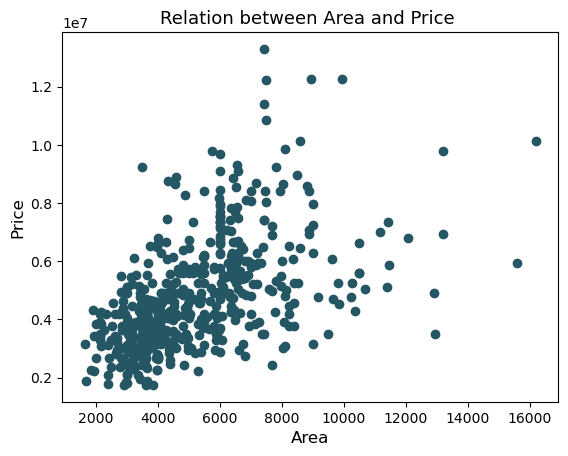

In [11]:
plt.title('Relation between Area and Price ',size=13)
plt.xlabel('Area',size=12)
plt.ylabel('Price',size=12)
plt.scatter(df['area'],df['price'],color='#245664')
plt.show()

#### -> as shown we see that by increasing the area the price increased 

--------------------

In [12]:
bedrooms = df.groupby('bedrooms').mean().sort_values('price',ascending=False)
bedrooms = bedrooms[['price']].round(2)
bedrooms.reset_index(inplace=True)
bedrooms

,bedrooms,price
0,5,5819800.00
1,4,5729757.89
2,3,4954598.13
3,6,4791500.00
4,2,3632022.06
5,1,2712500.00


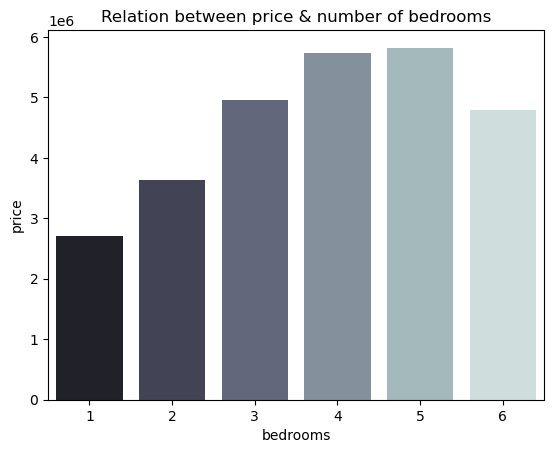

In [13]:
plt.title('Relation between price & number of bedrooms')
sns.barplot(bedrooms['bedrooms'],bedrooms['price'],palette = 'bone',ci=None)
plt.show()

#### -> as we see , price increasing by number of bedrooms as maximum number of increasing in 5 bedrooms 

--------------------

In [14]:
bathrooms = df.groupby('bathrooms').mean().sort_values('price',ascending=False)
bathrooms = bathrooms[['price']].round(2)
bathrooms.reset_index(inplace=True)
bathrooms

,bathrooms,price
0,4,12250000.00
1,3,7282100.00
2,2,6209206.32
3,1,4206912.72


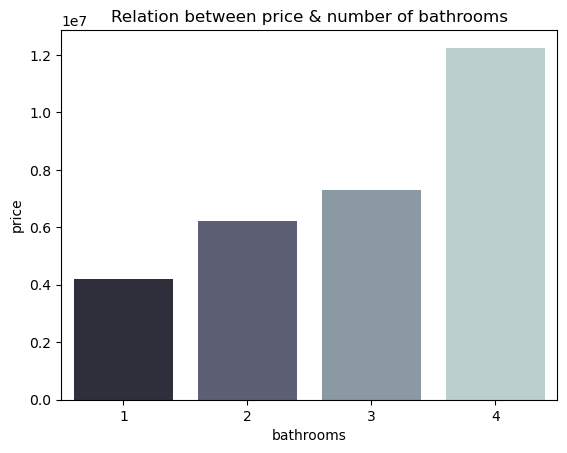

In [15]:
plt.title('Relation between price & number of bathrooms')
sns.barplot(bathrooms['bathrooms'],bathrooms['price'],palette = 'bone',ci=None)
plt.show()

#### -> as we see , price increasing by number of bathrooms

--------

In [16]:
stories = df.groupby('stories').mean().sort_values('price',ascending=False)
stories = stories[['price']].round(2)
stories.reset_index(inplace=True)
stories

,stories,price
0,4,7208449.76
1,3,5685435.90
2,2,4764073.53
3,1,4170658.59


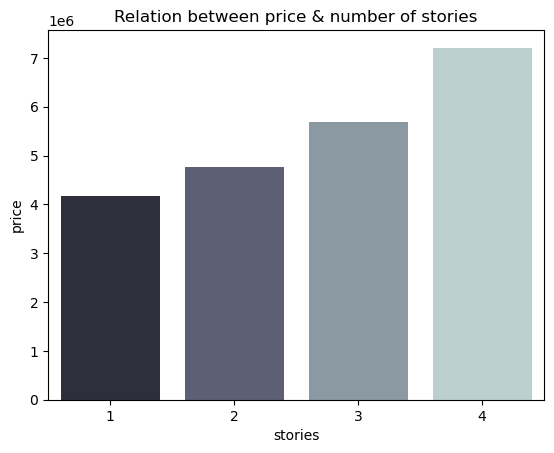

In [17]:
plt.title('Relation between price & number of stories')
sns.barplot(stories['stories'],stories['price'],palette = 'bone',ci=None)
plt.show()

#### -> as we see , price increasing by number of stories

----------

In [18]:
parking = df.groupby('parking').mean().sort_values('price',ascending=False)
parking = parking[['price']].round(2)
parking.reset_index(inplace=True)
parking

,parking,price
0,2,5896328.15
1,3,5867166.67
2,1,5190388.89
3,0,4136016.72


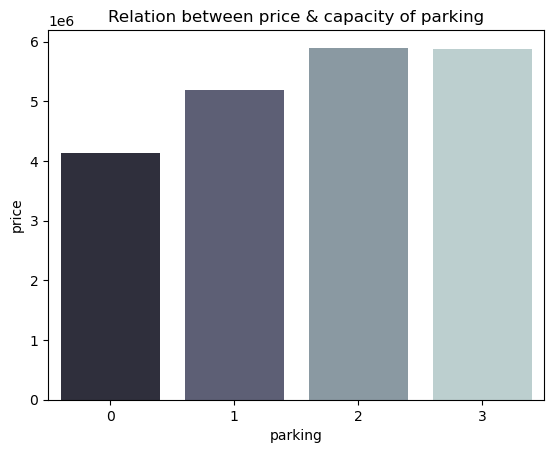

In [19]:
plt.title('Relation between price & capacity of parking')
sns.barplot(parking['parking'],parking['price'],palette = 'bone',ci=None)
plt.show()

#### -> we see , the price increased by increasing the capacity of parking 

---------------

<AxesSubplot:xlabel='prefarea', ylabel='price'>

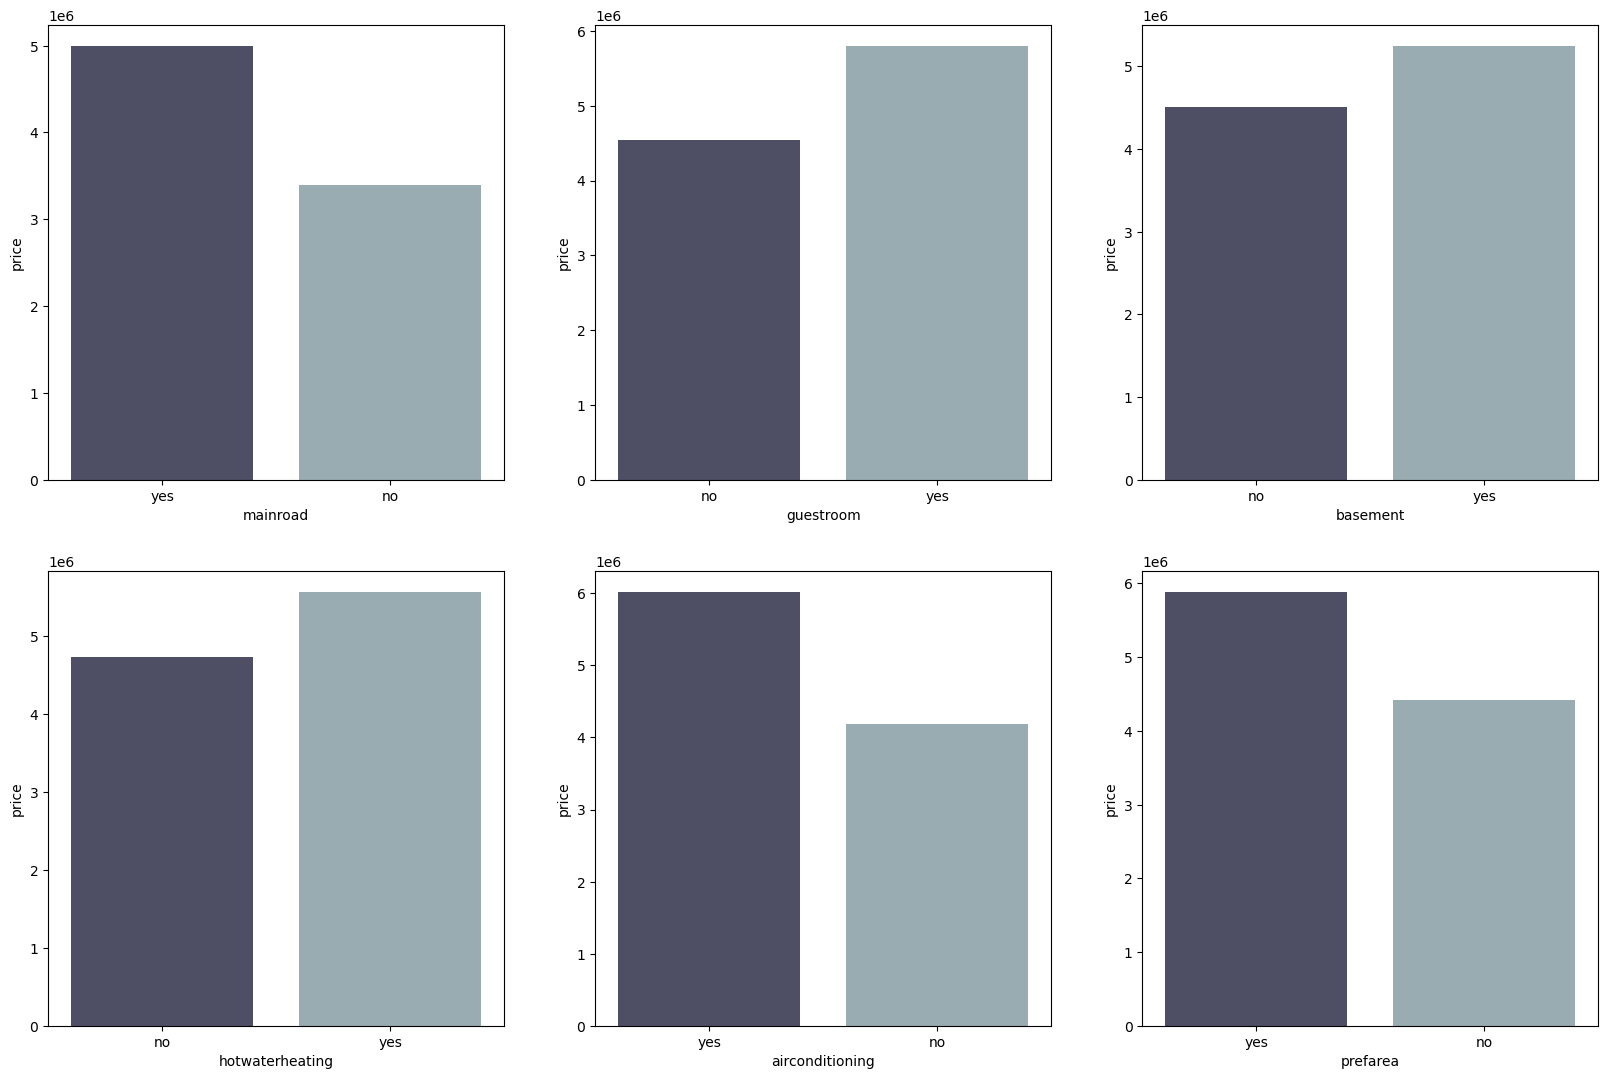

In [20]:
plt.figure(figsize=(20,13))

plt.subplot(2,3,1)
sns.barplot(df['mainroad'],df['price'],palette = 'bone',ci=None)

plt.subplot(2,3,2)
sns.barplot(df['guestroom'],df['price'],palette = 'bone',ci=None)

plt.subplot(2,3,3)
sns.barplot(df['basement'],df['price'],palette = 'bone',ci=None)

plt.subplot(2,3,4)
sns.barplot(df['hotwaterheating'],df['price'],palette = 'bone',ci=None)

plt.subplot(2,3,5)
sns.barplot(df['airconditioning'],df['price'],palette = 'bone',ci=None)

plt.subplot(2,3,6)
sns.barplot(df['prefarea'],df['price'],palette = 'bone',ci=None)


#### -> we see the effect of every this features on the price if exists or not

---------------

In [21]:
furnishingstatus = df.groupby('furnishingstatus').mean().sort_values('price',ascending=False)
furnishingstatus = furnishingstatus[['price']].round(2)
furnishingstatus.reset_index(inplace=True)
furnishingstatus

,furnishingstatus,price
0,furnished,5495696.00
1,semi-furnished,4907524.23
2,unfurnished,4013831.46


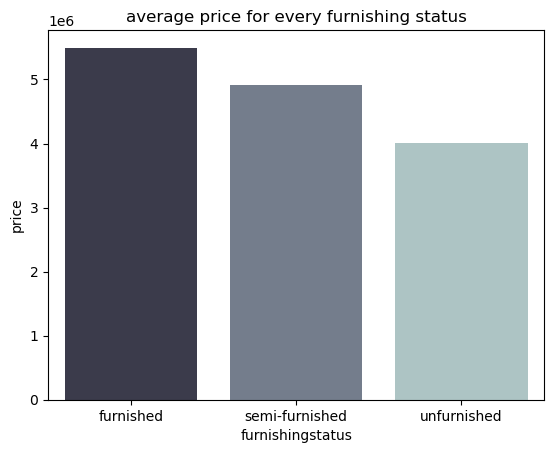

In [22]:
plt.title('average price for every furnishing status')
sns.barplot(furnishingstatus['furnishingstatus'],furnishingstatus['price'],palette = 'bone',ci=None)
plt.show()

#### -> we see the average price of every finishing status 

-----------------

### Visualization for all data 

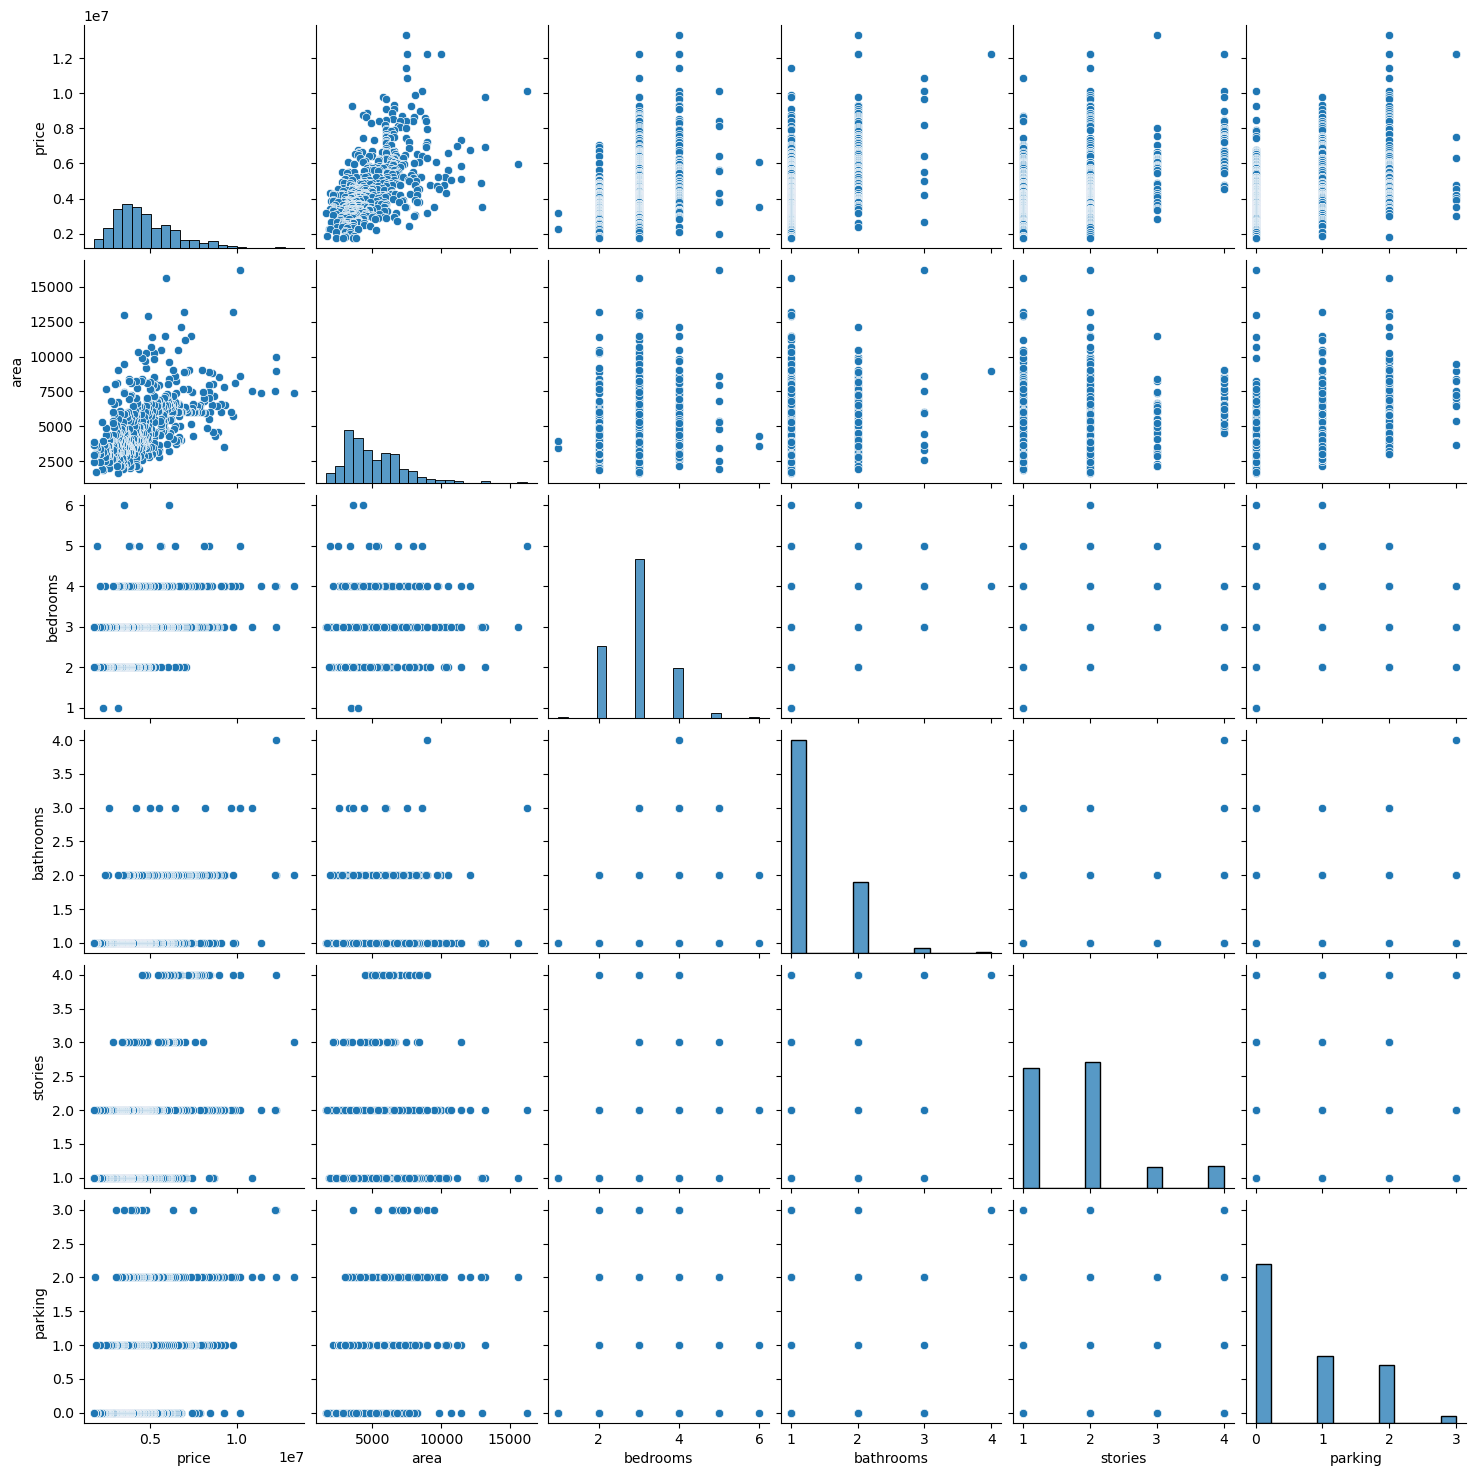

In [23]:
sns.pairplot(df)
plt.show()

----------------------

### Model building

#### becouse the target is a countinous data we will build a Regression model 

-----------------
### import libraries of Machine Learning

In [24]:
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge 
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

-------------------------

## Data preprocessing 

### Encoding

In [25]:
df = pd.get_dummies(data=df,columns=['mainroad','guestroom', 'basement', 'hotwaterheating', 'airconditioning','prefarea', 'furnishingstatus'],drop_first=True)

In [26]:
df

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,1,0,0,0,1,1,0,0
1,12250000,8960,4,4,4,3,1,0,0,0,1,0,0,0
2,12250000,9960,3,2,2,2,1,0,1,0,0,1,1,0
3,12215000,7500,4,2,2,3,1,0,1,0,1,1,0,0
4,11410000,7420,4,1,2,2,1,1,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2,1,0,1,0,0,0,0,1
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1,0
542,1750000,3620,2,1,1,0,1,0,0,0,0,0,0,1
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0,0


#### - we used dummy variable encoding ro convert unnomerical data to numeric

---------------------------

### Data split 

In [27]:
x =df[['area', 'bedrooms', 'bathrooms', 'stories', 'parking',
       'mainroad_yes', 'guestroom_yes', 'basement_yes', 'hotwaterheating_yes',
       'airconditioning_yes', 'prefarea_yes',
       'furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished']]
y = df[['price']]

---------------------

### Data normalization using standerd scaller 

In [28]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [29]:
x

array([[ 1.04672629,  1.40341936,  1.42181174, ...,  1.80494113,
        -0.84488844, -0.6964292 ],
       [ 1.75700953,  1.40341936,  5.40580863, ..., -0.55403469,
        -0.84488844, -0.6964292 ],
       [ 2.21823241,  0.04727831,  1.42181174, ...,  1.80494113,
         1.18358821, -0.6964292 ],
       ...,
       [-0.70592066, -1.30886273, -0.57018671, ..., -0.55403469,
        -0.84488844,  1.43589615],
       [-1.03338891,  0.04727831, -0.57018671, ..., -0.55403469,
        -0.84488844, -0.6964292 ],
       [-0.5998394 ,  0.04727831, -0.57018671, ..., -0.55403469,
        -0.84488844,  1.43589615]])

---------------------

### Train & Test split of data

In [30]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.2,shuffle=True)
# we use shffling with split to avoid data ordering which affect the model perfomance

------------------------

## Model building 

### linear regression model

In [31]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [32]:
y_pred = model.predict(x_test)

In [33]:
train_accuracy = r2_score(y_train,model.predict(x_train))
print(f"The train accuracy : {train_accuracy}")

0.674260088885213

In [34]:
test_accuracy =r2_score(y_test,y_pred)
print(f"The test accuracy : {test_accuracy}")

0.7178659844928316

### cross validation for linear regression model 

In [35]:
scores = cross_val_score(LinearRegression(),x_train,y_train,cv=6)

In [36]:
scores

array([0.65139615, 0.68980898, 0.56971514, 0.60085139, 0.67036268,
       0.65713021])

In [37]:
#accuracy of cross validation
scores.mean()

0.639877423499217

---------------------

### Ridge model

In [38]:
rg_model = Ridge(alpha= 1)

In [39]:
rg_model.fit(x_train,y_train)

Ridge(alpha=1)

In [40]:
rg_pred = rg_model.predict(x_test)

In [42]:
rg_train_accuracy = r2_score(y_train,rg_model.predict(x_train))
print(f"The train accuracy : {rg_train_accuracy}")

0.6742590920700526

In [43]:
rg_test_accuracy = r2_score(y_test, rg_pred)
print(f"The test accuracy : {rg_test_accuracy}")

0.7180635902838366

------------------

### Lasso model 

In [44]:
ls_model = Lasso(alpha= 1)

In [45]:
ls_model.fit(x_train,y_train)

Lasso(alpha=1)

In [46]:
ls_pred = ls_model.predict(x_test)

In [47]:
ls_train_accuracy = r2_score(y_train,ls_model.predict(x_train))
print(f"The train accuracy : {ls_train_accuracy}")

0.6742600888829839

In [48]:
ls_test_accuracy = r2_score(y_test, rg_pred)
print(f"The test accuracy : {ls_test_accuracy}")

0.7180635902838366